More Normalized and Stable model cause all unnecassary features that has minimum efffect on the car price are removed and then the model was build.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
dataset = pd.read_csv(r'D:\CarPricePrediction\MyWork\4\cars_ds_final_2021.csv')

In [50]:
dataset.head(5)

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range,Selling_Price
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# check the columns
dataset.columns

Index(['Unnamed: 0', 'Make', 'Model', 'Variant', 'Ex-Showroom_Price',
       'Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration',
       ...
       'Automatic_Headlamps', 'Engine_Type', 'ASR_/_Traction_Control',
       'Cruise_Control', 'USB_Ports', 'Heads-Up_Display', 'Welcome_Lights',
       'Battery', 'Electric_Range', 'Selling_Price'],
      dtype='object', length=142)

In [52]:
# information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Columns: 142 entries, Unnamed: 0 to Selling_Price
dtypes: float64(10), int64(1), object(131)
memory usage: 1.4+ MB


In [53]:
# columns with categorical values
dataset.select_dtypes(include=['object']).columns

Index(['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement',
       'Drivetrain', 'Cylinder_Configuration', 'Emission_Norm',
       'Engine_Location', 'Fuel_System',
       ...
       'Paddle_Shifters', 'Leather_Wrapped_Steering', 'Automatic_Headlamps',
       'Engine_Type', 'ASR_/_Traction_Control', 'Cruise_Control',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=131)

In [54]:
# Check the first few rows of the transformed dataframe
print(dataset.head(10))

   Unnamed: 0    Make      Model  Variant Ex-Showroom_Price Displacement  \
0           0    Tata  Nano Genx       Xt      Rs. 2,92,667       624 cc   
1           1    Tata  Nano Genx       Xe      Rs. 2,36,447       624 cc   
2           2    Tata  Nano Genx  Emax Xm      Rs. 2,96,661       624 cc   
3           3    Tata  Nano Genx      Xta      Rs. 3,34,768       624 cc   
4           4    Tata  Nano Genx       Xm      Rs. 2,72,223       624 cc   
5           5    Tata  Nano Genx      Xma      Rs. 3,14,815       624 cc   
6           6  Datsun    Redi-Go        D      Rs. 2,79,650       799 cc   
7           7  Datsun    Redi-Go        T      Rs. 3,51,832       799 cc   
8           8  Datsun    Redi-Go        A      Rs. 3,33,419       799 cc   
9           9  Datsun    Redi-Go        S      Rs. 3,62,000       799 cc   

   Cylinders  Valves_Per_Cylinder               Drivetrain  \
0        2.0                  2.0   RWD (Rear Wheel Drive)   
1        2.0                  2.0   RWD

In [55]:
len(dataset.select_dtypes(include=['object']).columns)

131

In [56]:
# columns with numerical values
dataset.select_dtypes(include=['int64', 'float64']).columns

Index(['Unnamed: 0', 'Cylinders', 'Valves_Per_Cylinder', 'Doors',
       'Front_Tyre_&_Rim', 'Rear_Tyre_&_Rim', 'Seating_Capacity',
       'Wheels_Size', 'Number_of_Airbags', 'USB_Ports', 'Selling_Price'],
      dtype='object')

In [57]:
len(dataset.select_dtypes(include=['int64', 'float64']).columns)

11

In [58]:
# statistical summary
dataset.describe()

,Unnamed: 0,Cylinders,Valves_Per_Cylinder,Doors,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Seating_Capacity,Wheels_Size,Number_of_Airbags,USB_Ports,Selling_Price
count,1267.000000,1201.000000,1165.000000,1263.00000,0.0,0.0,1261.000000,0.0,1136.000000,25.000000,0.0
mean,633.000000,4.382182,3.977682,4.54711,NaN,NaN,5.256146,NaN,3.777289,1.920000,NaN
std,365.895705,1.667728,0.836978,0.74951,NaN,NaN,1.139571,NaN,2.523660,0.759386,NaN
min,0.000000,2.000000,1.000000,2.00000,NaN,NaN,2.000000,NaN,1.000000,1.000000,NaN
25%,316.500000,4.000000,4.000000,4.00000,NaN,NaN,5.000000,NaN,2.000000,1.000000,NaN
50%,633.000000,4.000000,4.000000,5.00000,NaN,NaN,5.000000,NaN,2.000000,2.000000,NaN
75%,949.500000,4.000000,4.000000,5.00000,NaN,NaN,5.000000,NaN,6.000000,2.000000,NaN
max,1266.000000,16.000000,16.000000,5.00000,NaN,NaN,16.000000,NaN,14.000000,3.000000,NaN


In [59]:
# check if there are any null values
dataset.isnull().values.any()

True

In [60]:
# check how many null values
dataset.isnull().values.sum()

61293

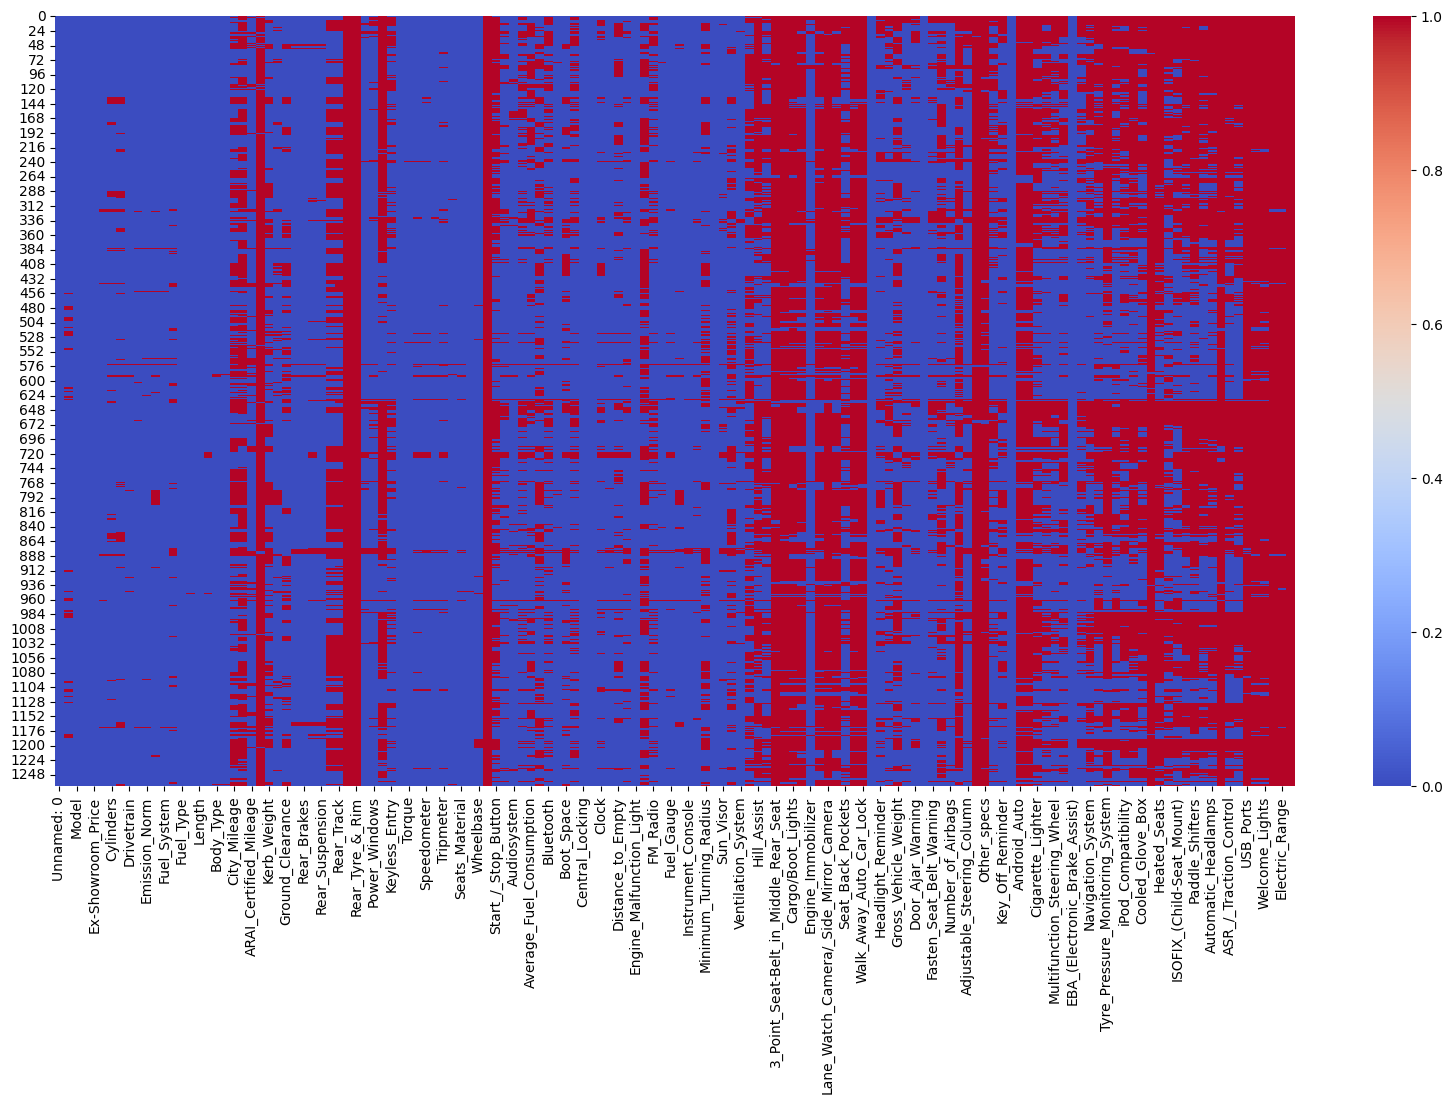

In [61]:
# show the null values using the heatmap
plt.figure(figsize=(20,10))
sns.heatmap(dataset.isnull(), cmap='coolwarm')
plt.show()

In [62]:
# List of irrelevant columns based on our analysis
irrelevant_columns = [
    'Handbrake', 'Instrument_Console', 'Low_Fuel_Warning', 'Minimum_Turning_Radius', 'Wheelbase',
    'Sun_Visor', 'Third_Row_AC_Vents', 'Ventilation_System', 'Extended_Warranty',
    'Auto-Dimming_Rear-View_Mirror', 'Hill_Assist', 'Gear_Indicator', 'Start_/_Stop_Button', 'Length',
    '3_Point_Seat-Belt_in_Middle_Rear_Seat', 'Ambient_Lightning', 'Cargo/Boot_Lights', 'Gross_Vehicle_Weight', 
    'Drive_Modes', 'Voice_Recognition', 'Walk_Away_Auto_Car_Lock', 'Headlight_Reminder', 'City_Mileage',
    'Adjustable_Headrests', 'Airbags', 'Door_Ajar_Warning',
    'Fasten_Seat_Belt_Warning', 'Gear_Shift_Reminder', 'Compression_Ratio', 'Adjustable_Steering_Column',
    'Other_Specs', 'Other_specs', 'Parking_Assistance', 'Key_Off_Reminder',
    'Android_Auto', 'Apple_CarPlay', 'Cigarette_Lighter', 'Infotainment_Screen', 'Highway_Mileage',
    'Multifunction_Steering_Wheel', 'Average_Speed', 'Navigation_System', 'Second_Row_AC_Vents', 'Front_Track',
    'Tyre_Pressure_Monitoring_System', 'Rear_Center_Armrest', 'iPod_Compatibility',
    'Cooled_Glove_Box', 'Recommended_Tyre_Pressure', 'Heated_Seats', 'Turbocharger', 'Power_Seats', 
    'ISOFIX_(Child-Seat_Mount)', 'Rain_Sensing_Wipers', 'Paddle_Shifters', 'Passenger_Side_Seat-Belt_Reminder',
    'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type', 'Kerb_Weight', 'High_Speed_Alert_System','ESP_(Electronic_Stability_Program)',
    'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports', 'Heads-Up_Display', 'Lane_Watch_Camera/_Side_Mirror_Camera',
    'Welcome_Lights', 'Battery', 'Electric_Range', 'Rear_Track','Front_Tyre_&_Rim','Rear_Tyre_&_Rim','Wheels_Size','ARAI_Certified_Mileage_for_CNG'
]

# Drop these irrelevant columns from the dataset
car_data_filtered = dataset.drop(columns=irrelevant_columns, errors='ignore')

# Check the remaining columns after dropping
car_data_filtered.head()


,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Multifunction_Display,Engine_Immobilizer,Seat_Back_Pockets,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Number_of_Airbags,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Selling_Price
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,Yes,NaN,NaN,No,No,NaN,No,No,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,Yes,NaN,NaN,No,No,NaN,No,No,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,Yes,NaN,NaN,No,No,NaN,No,No,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,Yes,NaN,NaN,No,No,NaN,No,No,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,Yes,NaN,NaN,No,No,NaN,No,No,NaN,NaN


In [63]:
len(car_data_filtered.select_dtypes(include=['object']).columns)

60

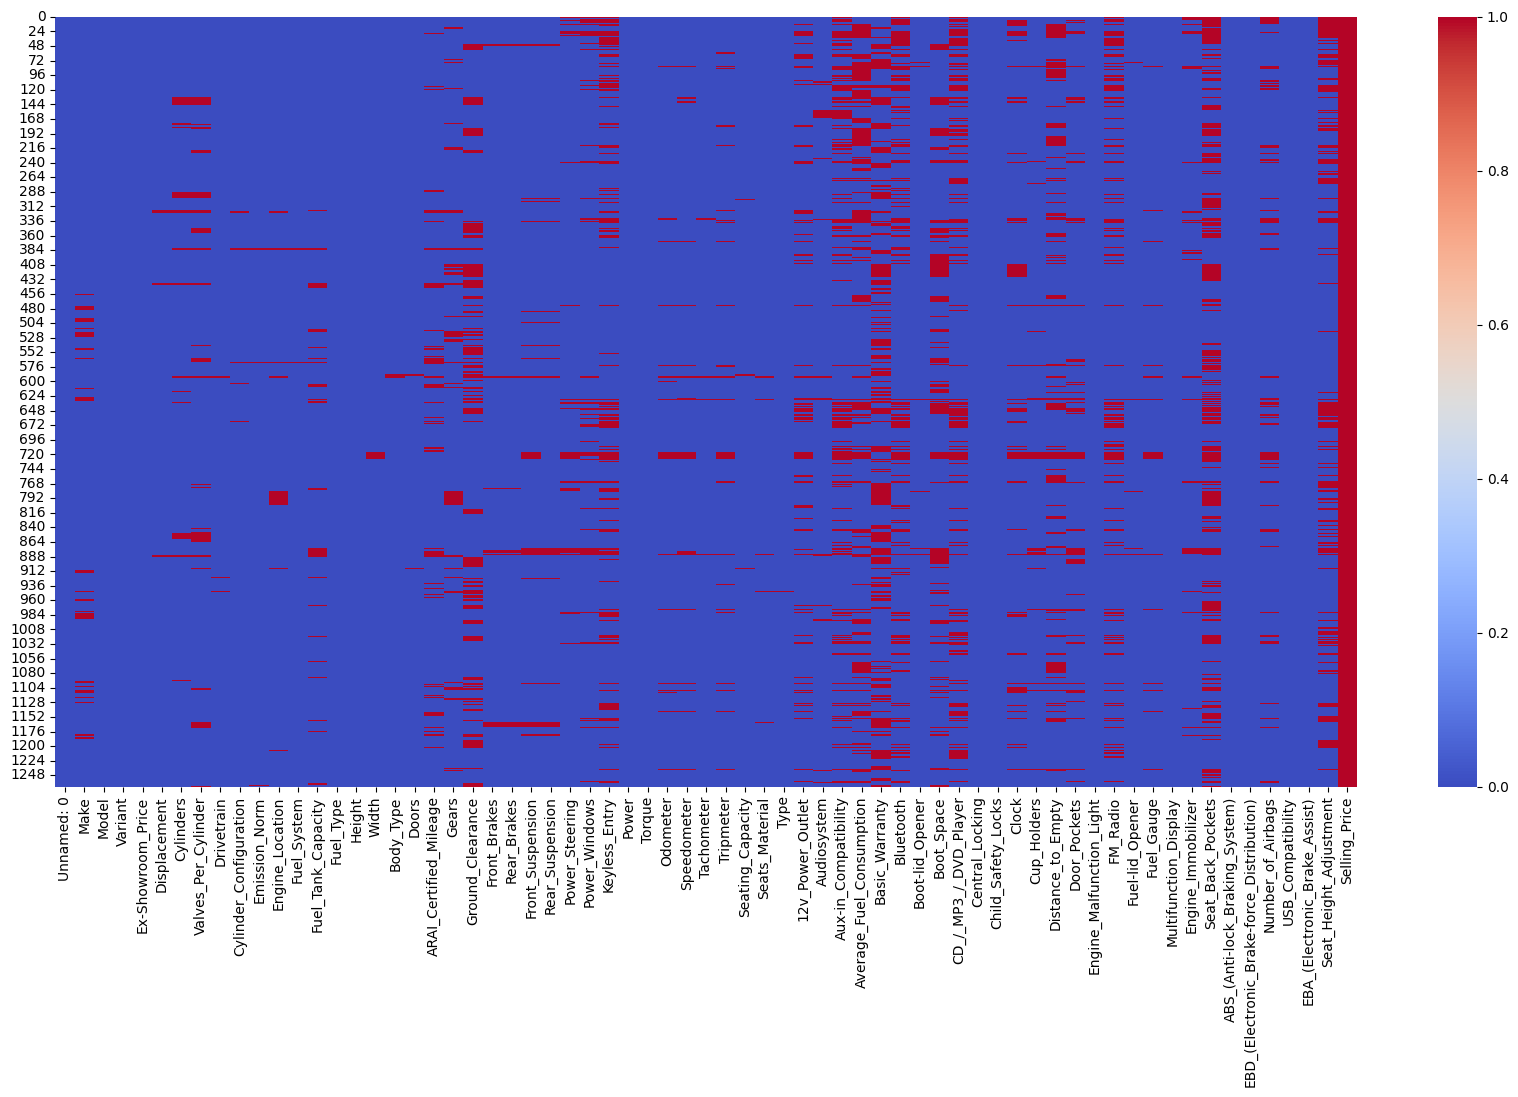

In [64]:
# show the null values using the heatmap
plt.figure(figsize=(21,10))
sns.heatmap(car_data_filtered.isnull(), cmap='coolwarm')
plt.show()

In [65]:
import pandas as pd

# Create a DataFrame showing the number of missing (NaN) values per column
missing_values_table = pd.DataFrame({
    'Column': car_data_filtered.columns,
    'Missing Values': car_data_filtered.isnull().sum()
})

# Sort the table by the number of missing values in descending order
missing_values_table = missing_values_table.sort_values(by='Missing Values', ascending=False)

# Display the table
missing_values_table.reset_index(drop=True, inplace=True)
missing_values_table


,Column,Missing Values
0,Selling_Price,1267
1,Seat_Back_Pockets,446
2,Basic_Warranty,438
3,Average_Fuel_Consumption,344
4,Seat_Height_Adjustment,319
...,...,...
62,Fuel_Type,0
63,Child_Safety_Locks,0
64,Central_Locking,0
65,Power,0


In [66]:
# Fill missing values in numeric columns with the mean value of the respective column
numeric_columns = car_data_filtered.select_dtypes(include=['number']).columns
car_data_filtered[numeric_columns] = car_data_filtered[numeric_columns].fillna(car_data_filtered[numeric_columns].mean())

# For non-numeric columns, you can fill missing values with the mode (most frequent value)
non_numeric_columns = car_data_filtered.select_dtypes(exclude=['number']).columns
car_data_filtered[non_numeric_columns] = car_data_filtered[non_numeric_columns].apply(lambda col: col.fillna(col.mode()[0]))

# Check if there are any remaining missing values
print(car_data_filtered.isnull().sum())



Unnamed: 0                          0
Make                                0
Model                               0
Variant                             0
Ex-Showroom_Price                   0
                                 ... 
Number_of_Airbags                   0
USB_Compatibility                   0
EBA_(Electronic_Brake_Assist)       0
Seat_Height_Adjustment              0
Selling_Price                    1267
Length: 67, dtype: int64


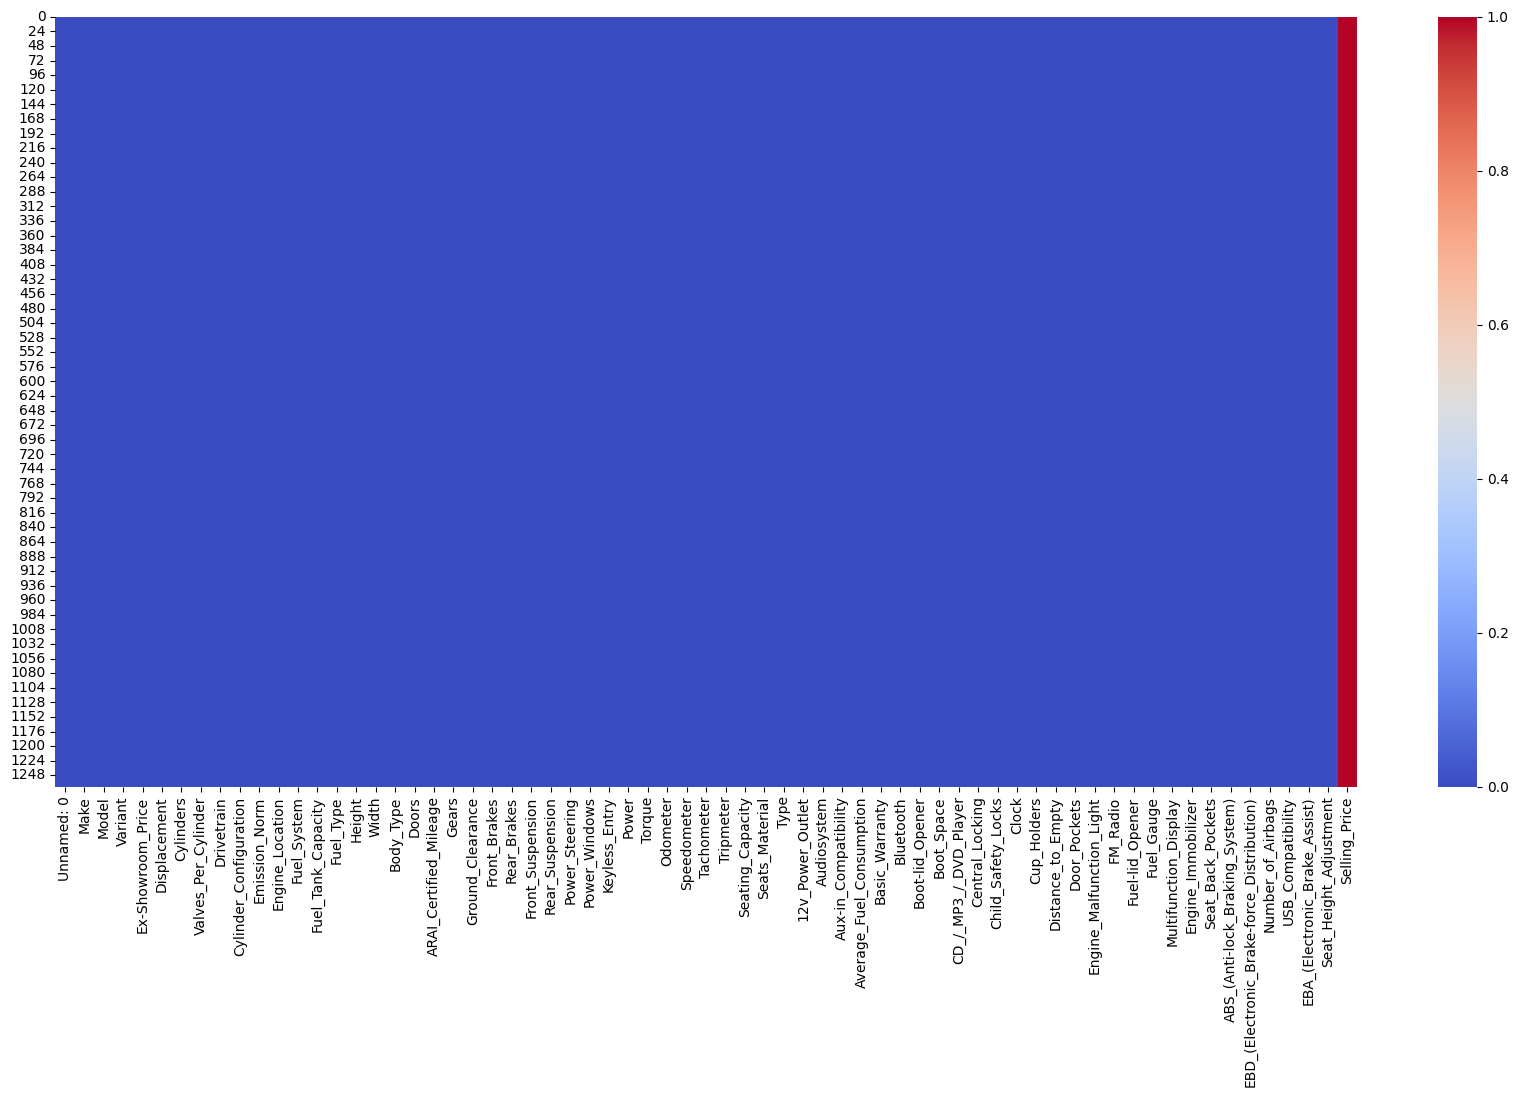

In [67]:
# show the null values using the heatmap
plt.figure(figsize=(21,10))
sns.heatmap(car_data_filtered.isnull(), cmap='coolwarm')
plt.show()

In [68]:
categorical_columns = ['ABS_(Anti-lock_Braking_System)','Central_Locking','Engine_Malfunction_Light','Child_Safety_Locks','EBD_(Electronic_Brake-force_Distribution)','USB_Compatibility','EBA_(Electronic_Brake_Assist)']

for col in categorical_columns:
    print(f"Unique values in {col}: {car_data_filtered[col].unique()}")


Unique values in ABS_(Anti-lock_Braking_System): ['No' 'Yes']
Unique values in Central_Locking: ['Yes' 'No']
Unique values in Engine_Malfunction_Light: ['Yes' 'No']
Unique values in Child_Safety_Locks: ['Yes' 'No']
Unique values in EBD_(Electronic_Brake-force_Distribution): ['No' 'Yes']
Unique values in USB_Compatibility: ['No' 'Yes']
Unique values in EBA_(Electronic_Brake_Assist): ['No' 'Yes']


In [69]:
car_data_filtered

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Multifunction_Display,Engine_Immobilizer,Seat_Back_Pockets,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Number_of_Airbags,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Selling_Price
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.000000,RWD (Rear Wheel Drive),In-line,...,Yes,Yes,Yes,No,No,3.777289,No,No,Manual Adjustment,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.000000,RWD (Rear Wheel Drive),In-line,...,Yes,Yes,Yes,No,No,3.777289,No,No,Manual Adjustment,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.000000,RWD (Rear Wheel Drive),In-line,...,Yes,Yes,Yes,No,No,3.777289,No,No,Manual Adjustment,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.000000,RWD (Rear Wheel Drive),In-line,...,Yes,Yes,Yes,No,No,3.777289,No,No,Manual Adjustment,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.000000,RWD (Rear Wheel Drive),In-line,...,Yes,Yes,Yes,No,No,3.777289,No,No,Manual Adjustment,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,1262,Bmw,X5,Xdrive30D Xline,"Rs. 82,90,000",2993 cc,6.0,4.000000,AWD (All Wheel Drive),In-line,...,Yes,Yes,Yes,Yes,Yes,8.000000,Yes,Yes,Electric Adjustment with Memory,NaN
1263,1263,Bmw,X5,Xdrive40I M Sport,"Rs. 82,90,000",2998 cc,6.0,4.000000,AWD (All Wheel Drive),In-line,...,Yes,Yes,Yes,Yes,Yes,8.000000,Yes,Yes,Electric Adjustment with Memory,NaN
1264,1264,Mahindra,Alturas G4,2Wd At,"Rs. 27,70,150",2157 cc,4.0,3.977682,FWD (Front Wheel Drive),In-line,...,Yes,Yes,Yes,Yes,Yes,2.000000,Yes,Yes,Electric Adjustment with Memory,NaN
1265,1265,Mahindra,Alturas G4,4Wd At,"Rs. 30,70,150",2157 cc,4.0,4.000000,4WD,In-line,...,Yes,Yes,Yes,Yes,Yes,9.000000,Yes,Yes,Electric Adjustment with Memory,NaN


In [70]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to categorical columns
label_encoders = {}  # Dictionary to store label encoders for future use
for column in car_data_filtered.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    car_data_filtered[column] = le.fit_transform(car_data_filtered[column].astype(str))
    label_encoders[column] = le  # Save the encoder for future inverse transformation


In [71]:
# Apply one-hot encoding to categorical columns
car_data_encoded = pd.get_dummies(car_data_filtered, drop_first=True)


In [72]:
car_data_encoded.head()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Multifunction_Display,Engine_Immobilizer,Seat_Back_Pockets,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Number_of_Airbags,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Selling_Price
0,0,35,158,976,345,112,2.0,2.0,3,1,...,1,0,0,0,0,3.777289,0,0,2,NaN
1,1,35,158,947,326,112,2.0,2.0,3,1,...,1,0,0,0,0,3.777289,0,0,2,NaN
2,2,35,158,487,348,112,2.0,2.0,3,1,...,1,0,0,0,0,3.777289,0,0,2,NaN
3,3,35,158,982,427,112,2.0,2.0,3,1,...,1,0,0,0,0,3.777289,0,0,2,NaN
4,4,35,158,961,336,112,2.0,2.0,3,1,...,1,0,0,0,0,3.777289,0,0,2,NaN


In [73]:
dataset_2 = car_data_encoded.drop(columns='Selling_Price')

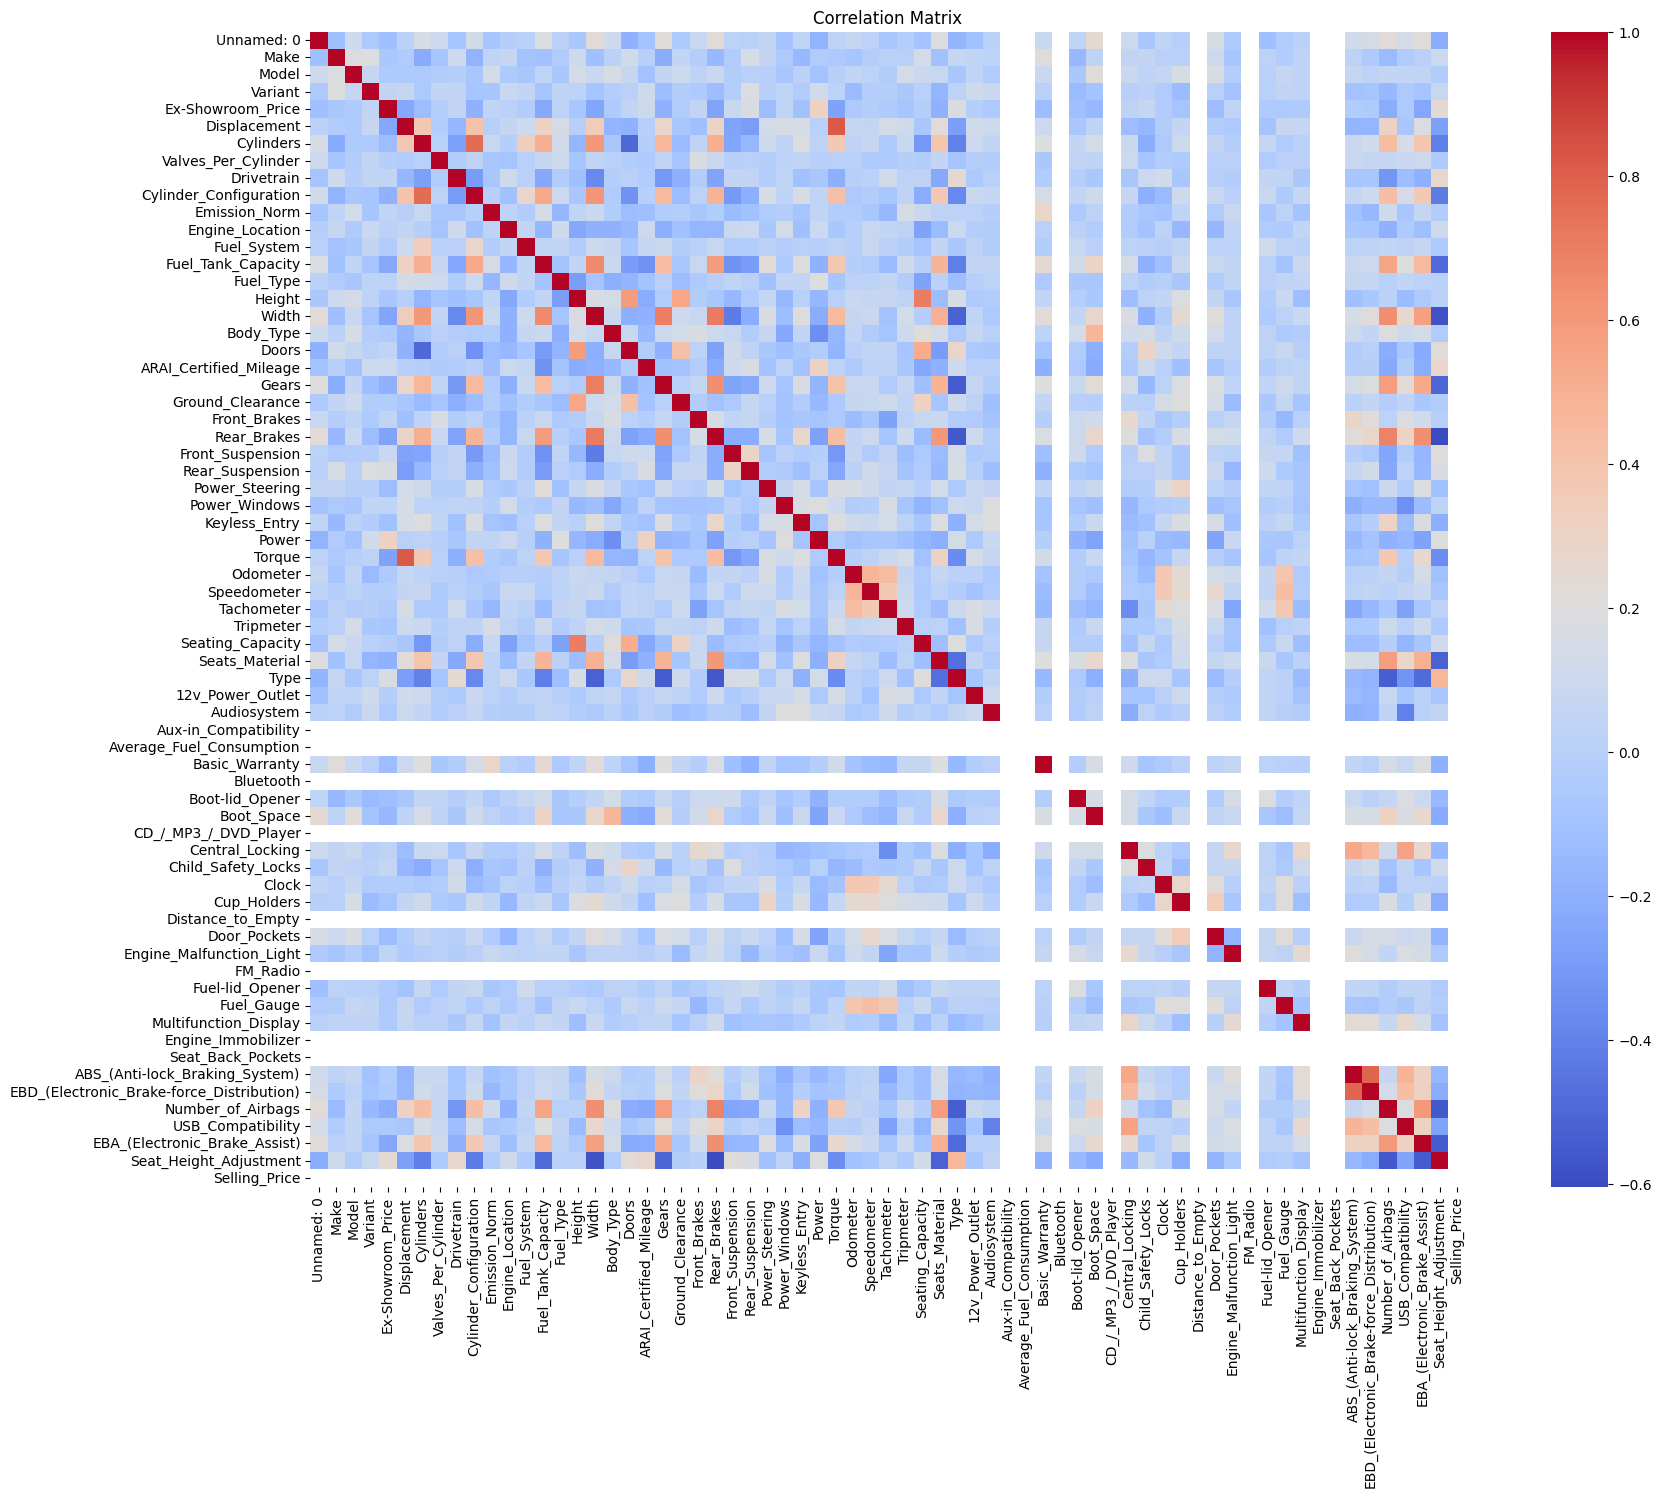

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = car_data_encoded.corr()

# Set the size of the plot
plt.figure(figsize=(22, 15))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, cmap='coolwarm', square=True)

# Add title and show the plot
plt.title('Correlation Matrix')
plt.show()


In [75]:
# If we remove the three rows with categorical values then:

# ABS
# Child Safety Lock
# Engine Malfunction Light

In [76]:
# List of irrelevant columns based on our analysis
irrelevant_columns = [
    'Aux-in_Compatibility','Unnamed: 0','Average_Fuel_Consumption','Keyless_Entry','Seats_Material','Cup_Holders','FM_Radio','Seat_Back_Pockets','Bluetooth','Engine_Immobilizer','CD_/_MP3_/_DVD_Player','Distance_to_Empty'
]

# Drop these irrelevant columns from the dataset
car_data_filtered3 = car_data_encoded.drop(columns=irrelevant_columns, errors='ignore')

# Check the remaining columns after dropping
car_data_filtered3.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Fuel-lid_Opener,Fuel_Gauge,Multifunction_Display,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Number_of_Airbags,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Selling_Price
0,35,158,976,345,112,2.0,2.0,3,1,2,...,0,2,1,0,0,3.777289,0,0,2,NaN
1,35,158,947,326,112,2.0,2.0,3,1,2,...,0,2,1,0,0,3.777289,0,0,2,NaN
2,35,158,487,348,112,2.0,2.0,3,1,2,...,0,2,1,0,0,3.777289,0,0,2,NaN
3,35,158,982,427,112,2.0,2.0,3,1,2,...,0,2,1,0,0,3.777289,0,0,2,NaN
4,35,158,961,336,112,2.0,2.0,3,1,2,...,0,2,1,0,0,3.777289,0,0,2,NaN


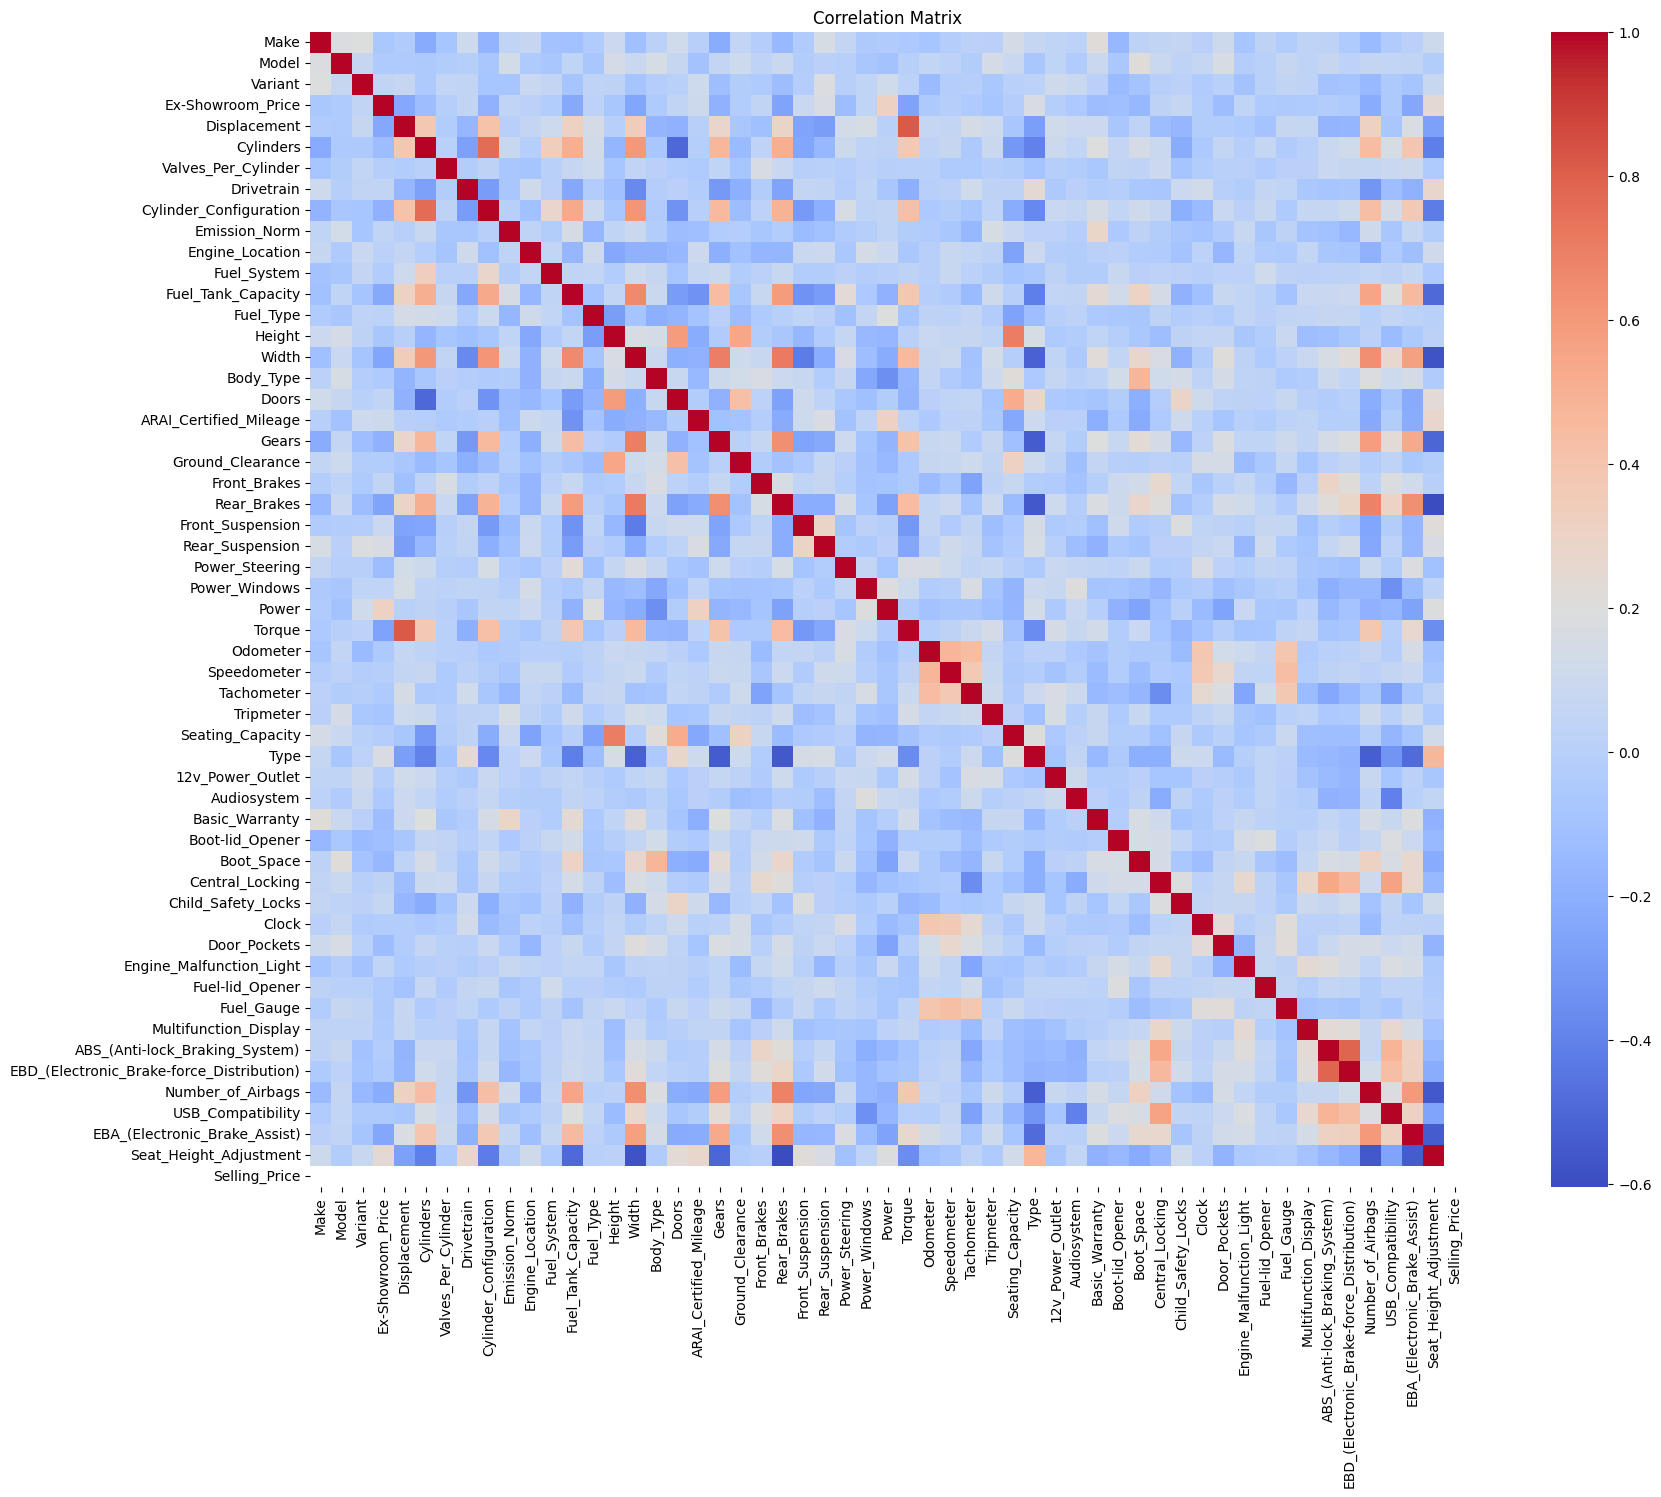

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = car_data_filtered3.corr()

# Set the size of the plot
plt.figure(figsize=(22, 15))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, cmap='coolwarm', square=True)

# Add title and show the plot
plt.title('Correlation Matrix')
plt.show()

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Select features (exclude the target variable 'Selling_Price')
X = car_data_filtered3.drop('Selling_Price', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DataFrame to hold VIF values
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Display VIF values
print(vif_data)


                                      Feature       VIF
0                                        Make  1.498686
1                                       Model  1.266742
2                                     Variant  1.335636
3                           Ex-Showroom_Price  1.319288
4                                Displacement  4.762672
5                                   Cylinders  3.885365
6                         Valves_Per_Cylinder  1.136321
7                                  Drivetrain  1.478662
8                      Cylinder_Configuration  3.402267
9                               Emission_Norm  1.505417
10                            Engine_Location  1.372148
11                                Fuel_System  1.301426
12                         Fuel_Tank_Capacity  2.642576
13                                  Fuel_Type  1.701360
14                                     Height  3.849863
15                                      Width  5.217953
16                                  Body_Type  1

In [79]:
# Splitting Dataset into training and testing:

x = car_data_filtered3.iloc[:, 1:].values

In [80]:
x.shape

(1267, 54)

In [81]:
y = car_data_filtered3.iloc[:, 0].values

In [82]:
y.shape

(1267,)

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [84]:
x_train.shape

(1013, 54)

In [85]:
x_test.shape

(254, 54)

In [86]:
y_train.shape

(1013,)

In [87]:
y_test.shape

(254,)

In [88]:
# Random Forest Regression: 

from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train, y_train)

RandomForestRegressor()

In [89]:
y_pred = regressor_rf.predict(x_test)

In [90]:
# R^2 (coefficient of determination) regression score function
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9017074168229832

In [91]:
car_data_filtered3.head(2)

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Fuel-lid_Opener,Fuel_Gauge,Multifunction_Display,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Number_of_Airbags,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Selling_Price
0,35,158,976,345,112,2.0,2.0,3,1,2,...,0,2,1,0,0,3.777289,0,0,2,NaN
1,35,158,947,326,112,2.0,2.0,3,1,2,...,0,2,1,0,0,3.777289,0,0,2,NaN


In [92]:
# Specify the filename to save the dataset
output_filename = 'encoded_car_data_without_selling_price3.csv'

# Save the DataFrame to a CSV file
car_data_filtered3.to_csv(output_filename, index=False)

print(f"Dataset saved to {output_filename}")


Dataset saved to encoded_car_data_without_selling_price3.csv


In [93]:
car_data_filtered3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Make                                       1267 non-null   int32  
 1   Model                                      1267 non-null   int32  
 2   Variant                                    1267 non-null   int32  
 3   Ex-Showroom_Price                          1267 non-null   int32  
 4   Displacement                               1267 non-null   int32  
 5   Cylinders                                  1267 non-null   float64
 6   Valves_Per_Cylinder                        1267 non-null   float64
 7   Drivetrain                                 1267 non-null   int32  
 8   Cylinder_Configuration                     1267 non-null   int32  
 9   Emission_Norm                              1267 non-null   int32  
 10  Engine_Location         

In [95]:
# To predict the selling price of all the cars of the main dataset.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load your modified, encoded dataset
file_path = 'encoded_car_data_without_selling_price3.csv'  # Update the path if needed
car_data_encoded = pd.read_csv(file_path)

# Ensure 'Selling_Price' column exists and is empty
if 'Selling_Price' not in car_data_encoded.columns:
    car_data_encoded['Selling_Price'] = None  # Add an empty column if not present

# Step 1: Define Features (X) and Target (y)
# Here we are predicting the 'Selling_Price', so we drop this column from X
X = car_data_encoded.drop('Selling_Price', axis=1)

# For this case, we'll assume the target 'Selling_Price' is what we want to predict
# y will remain undefined for prediction on real data, so we'll predict based on X later


# If you already trained the model on a dataset with known 'Selling_Price', load that model here.
# For now, I'll assume that you want to use RandomForest as an example and it's already trained.

# Step 3: Predict Selling Prices for the dataset
# Since we don't have y (target values) in this case, we'll directly predict on X
car_data_encoded['Selling_Price'] = regressor_rf.predict(X)

# Step 4: Save the updated dataset with predicted Selling Prices
output_filename = 'car_data_with_predicted_selling_prices3.csv'
car_data_encoded.to_csv(output_filename, index=False)

print(f"Updated dataset saved to {output_filename}")


Updated dataset saved to car_data_with_predicted_selling_prices3.csv


c:\Users\ranaa\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
